Project Introduction: Exploring Global Smoking Trends

In this project, we delve into the analysis of global smoking trends to gain insights into the prevalence and patterns of tobacco use across different regions. By examining datasets containing data on smoking prevalence, consumption, and related factors, we aim to uncover key trends and dynamics in smoking behavior worldwide.

Through data exploration, visualization, and analysis techniques, we seek to answer questions such as:

How has smoking prevalence changed over time in various countries?
Are there differences in smoking rates between different demographic groups?
What factors may influence smoking behavior, such as economic indicators or public health policies?

By shedding light on these questions, we hope to contribute to a better understanding of the global tobacco epidemic and inform efforts towards tobacco control and public health interventions.

All data was provided by https://ourworldindata.org/smoking

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

sns.color_palette("dark:#5A9_r", as_cmap=True)
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv(r"C:\Users\David Nguyen\Desktop\data analyst learning folder\Portfolio projects\share-of-adults-who-smoke.csv")

In [3]:
df.sample(10)

,Entity,Code,Year,Prevalence of current tobacco use (% of adults)
1181,Upper-middle-income countries,NaN,2019,23.14513
1166,United Kingdom,GBR,2018,16.10000
582,Kuwait,KWT,2005,19.50000
474,High-income countries,NaN,2019,22.86429
1041,South Africa,ZAF,2019,20.40000
180,Cambodia,KHM,2019,21.90000
3,Afghanistan,AFG,2015,26.00000
158,Bulgaria,BGR,2018,39.40000
285,Czechia,CZE,2019,30.90000
687,Maldives,MDV,2005,34.10000


In [4]:
df.head()

,Entity,Code,Year,Prevalence of current tobacco use (% of adults)
0,Afghanistan,AFG,2000,36.9
1,Afghanistan,AFG,2005,32.7
2,Afghanistan,AFG,2010,29.1
3,Afghanistan,AFG,2015,26.0
4,Afghanistan,AFG,2018,23.8


In [5]:
df.tail()

,Entity,Code,Year,Prevalence of current tobacco use (% of adults)
1234,Zimbabwe,ZWE,2010,15.6
1235,Zimbabwe,ZWE,2015,13.6
1236,Zimbabwe,ZWE,2018,12.1
1237,Zimbabwe,ZWE,2019,12.1
1238,Zimbabwe,ZWE,2020,11.7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 4 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Entity                                           1239 non-null   object 
 1   Code                                             1148 non-null   object 
 2   Year                                             1239 non-null   int64  
 3   Prevalence of current tobacco use (% of adults)  1239 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.8+ KB


In [7]:
df.describe()

,Year,Prevalence of current tobacco use (% of adults)
count,1239.000000,1239.000000
mean,2012.428571,23.724252
std,7.111359,10.925224
min,2000.000000,3.500000
25%,2005.000000,14.500000
50%,2015.000000,23.600000
75%,2019.000000,31.100000
max,2020.000000,68.500000


In [8]:
df.describe(include=object)

,Entity,Code
count,1239,1148
unique,177,164
top,Afghanistan,AFG
freq,7,7


In [9]:
df.isna().sum()

Entity                                              0
Code                                               91
Year                                                0
Prevalence of current tobacco use (% of adults)     0
dtype: int64

In [10]:
df.isnull().sum().sort_values(ascending=False)

Code                                               91
Entity                                              0
Year                                                0
Prevalence of current tobacco use (% of adults)     0
dtype: int64

In [11]:
df.duplicated().any()

False

In [12]:
df.shape

(1239, 4)

In [13]:
df.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence of current tobacco use (% of adults)'],
      dtype='object')

In [14]:
df['Year'].unique()

array([2000, 2005, 2010, 2015, 2018, 2019, 2020], dtype=int64)

In [15]:
#data is from the years 2000 to 2020

In [16]:
df.dtypes

Entity                                              object
Code                                                object
Year                                                 int64
Prevalence of current tobacco use (% of adults)    float64
dtype: object

In [17]:
df.sample(3)

,Entity,Code,Year,Prevalence of current tobacco use (% of adults)
102,Belgium,BEL,2018,23.9
81,Bangladesh,BGD,2018,35.2
210,Chile,CHL,2000,46.9


In [18]:
smoking_highest_percent = df.groupby("Prevalence of current tobacco use (% of adults)").sum()


In [19]:
smoking_highest_percent.sort_values(by='Prevalence of current tobacco use (% of adults)', ascending = False)[:5]

C:\Users\David Nguyen\AppData\Local\Temp\ipykernel_25152\3140373144.py:1: FutureWarning:

The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead



,Entity,Code,Year
Prevalence of current tobacco use (% of adults),,,
68.5,Kiribati,KIR,2000
66.9,Myanmar,MMR,2000
64.5,Nepal,NPL,2000
63.4,Nauru,NRU,2000
60.6,Myanmar,MMR,2005
...,...,...,...
5.5,EthiopiaTurkmenistan,ETHTKM,4035
5.3,PanamaPanama,PANPAN,4037
5.2,EthiopiaEthiopia,ETHETH,4037


In [20]:
grouped_df = df.groupby(['Prevalence of current tobacco use (% of adults)', 'Year'])

In [21]:
grouped_df = df.sort_values(by='Prevalence of current tobacco use (% of adults)', ascending = False)[:10]

In [22]:
print(grouped_df)

         Entity Code  Year  Prevalence of current tobacco use (% of adults)
574    Kiribati  KIR  2000                                             68.5
784     Myanmar  MMR  2000                                             66.9
805       Nepal  NPL  2000                                             64.5
798       Nauru  NRU  2000                                             63.4
785     Myanmar  MMR  2005                                             60.6
575    Kiribati  KIR  2005                                             60.4
799       Nauru  NRU  2005                                             59.2
77   Bangladesh  BGD  2000                                             57.6
800       Nauru  NRU  2010                                             55.5
434      Greece  GRC  2000                                             54.9


In [23]:
# Group the DataFrame by 'Year' and find the index of the row with the maximum prevalence for each year
max_indices = df.groupby('Year')['Prevalence of current tobacco use (% of adults)'].idxmax()

# Use the indices to get the corresponding rows from the original DataFrame
result = df.loc[max_indices]

# Print the result
print(result)


       Entity Code  Year  Prevalence of current tobacco use (% of adults)
574  Kiribati  KIR  2000                                             68.5
785   Myanmar  MMR  2005                                             60.6
800     Nauru  NRU  2010                                             55.5
801     Nauru  NRU  2015                                             51.8
802     Nauru  NRU  2018                                             49.2
803     Nauru  NRU  2019                                             49.2
804     Nauru  NRU  2020                                             48.5


In [25]:
# Choose the entity you want to analyze
chosen_entity = 'China'

# Filter the DataFrame to include only rows for the chosen entity
entity_df = df[df['Entity'] == chosen_entity]

# Find the row with the highest prevalence of current tobacco use for the chosen entity
max_row = entity_df.loc[entity_df['Prevalence of current tobacco use (% of adults)'].idxmax()]

# Print the result
print(max_row)


Entity                                             China
Code                                                 CHN
Year                                                2000
Prevalence of current tobacco use (% of adults)     26.7
Name: 217, dtype: object


In [26]:
# Choose the entity you want to analyze
chosen_entity = 'China'

# Filter the DataFrame to include only rows for the chosen entity
entity_df = df[df['Entity'] == chosen_entity]

# Find the row with the lowest prevalence of current tobacco use for the chosen entity
min_row = entity_df.loc[entity_df['Prevalence of current tobacco use (% of adults)'].idxmin()]

# Print the result
print(min_row)


Entity                                             China
Code                                                 CHN
Year                                                2020
Prevalence of current tobacco use (% of adults)     25.6
Name: 223, dtype: object


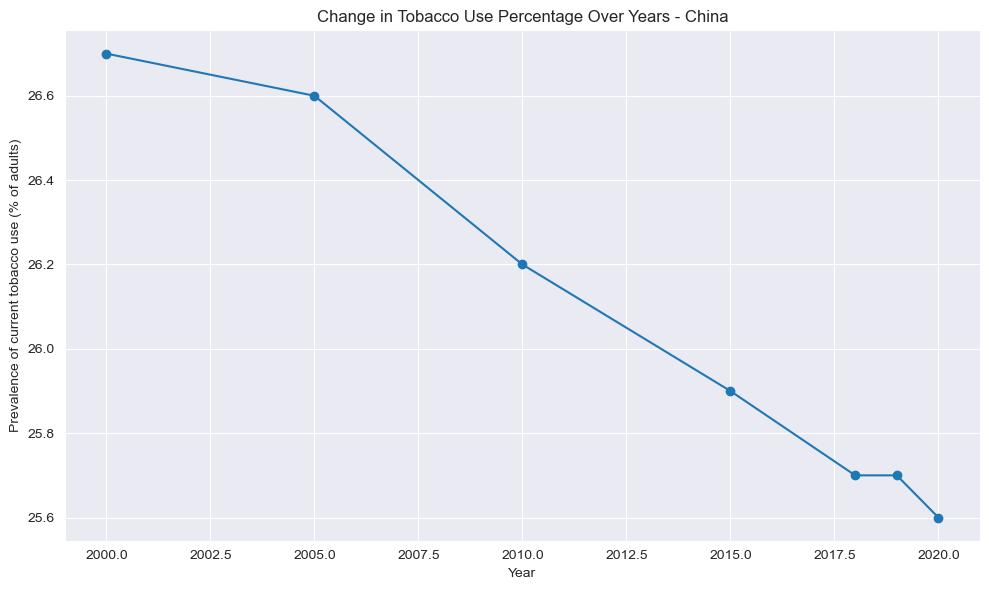

In [27]:

# Choose the entity you want to analyze
chosen_entity = 'China'

# Filter the DataFrame to include only rows for the chosen entity and the years 2000 to 2020
entity_df = df[(df['Entity'] == chosen_entity) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]

# Plot the change in tobacco use percentage over the years
plt.figure(figsize=(10, 6))
plt.plot(entity_df['Year'], entity_df['Prevalence of current tobacco use (% of adults)'], marker='o')


plt.xlabel('Year')
plt.ylabel('Prevalence of current tobacco use (% of adults)')
plt.title(f'Change in Tobacco Use Percentage Over Years - {chosen_entity}')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


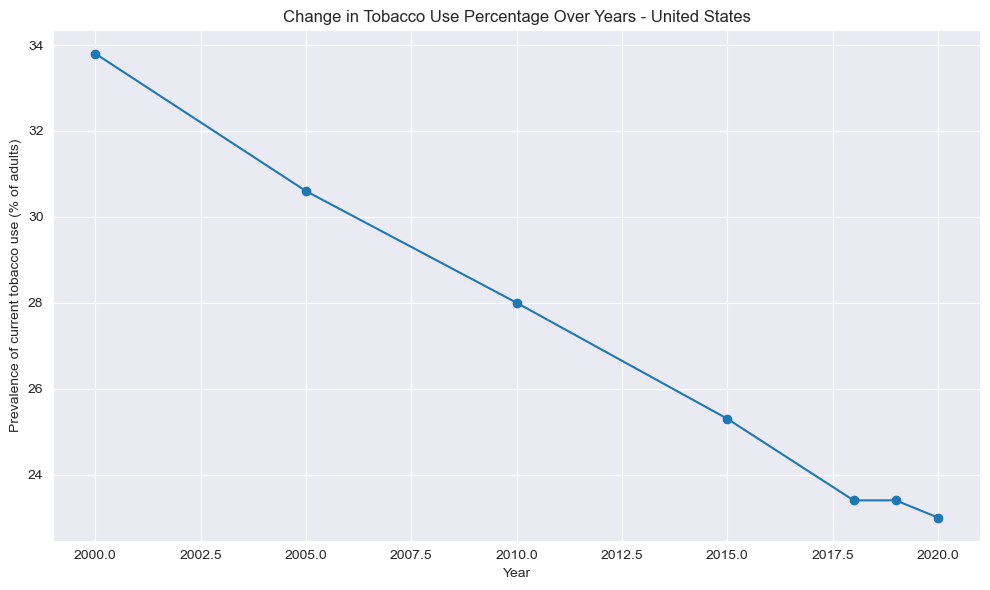

In [28]:
# Choose the entity you want to analyze
chosen_entity = 'United States'

# Plot the change in tobacco use percentage over the years for the chosen entity
plt.figure(figsize=(10, 6))
plt.plot(df[(df['Entity'] == chosen_entity) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]['Year'],
         df[(df['Entity'] == chosen_entity) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]['Prevalence of current tobacco use (% of adults)'],
         marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Prevalence of current tobacco use (% of adults)')
plt.title(f'Change in Tobacco Use Percentage Over Years - {chosen_entity}')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


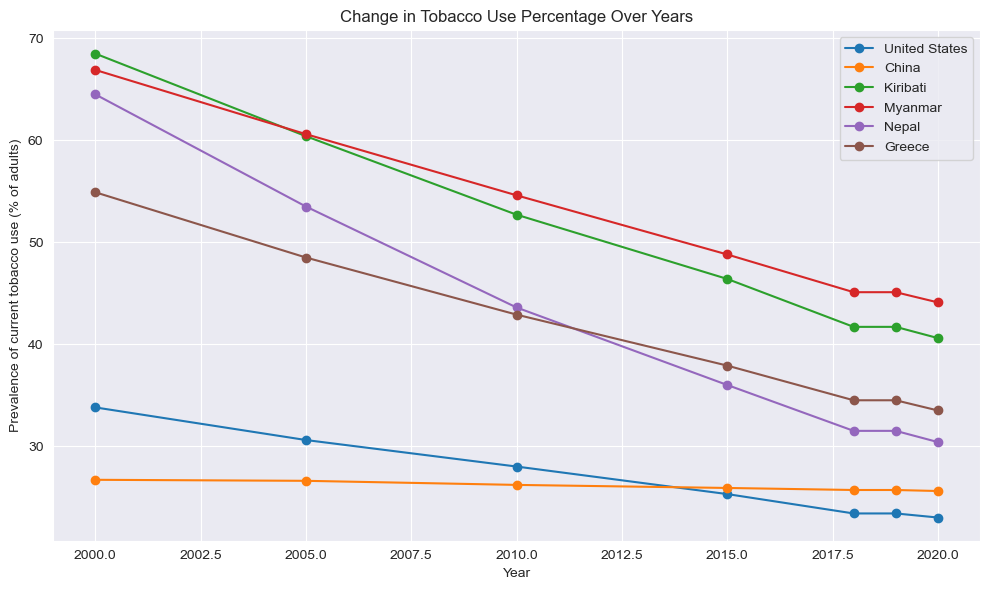

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Define the entities you want to plot
chosen_entities = ['United States', 'China', 'Kiribati', 'Myanmar', 'Nepal', 'Greece']

# Plot the change in tobacco use percentage over the years for the chosen entities
plt.figure(figsize=(10, 6))

for entity in chosen_entities:
    entity_data = df[(df['Entity'] == entity) & (df['Year'] >= 2000) & (df['Year'] <= 2020)]
    plt.plot(entity_data['Year'], entity_data['Prevalence of current tobacco use (% of adults)'],
             marker='o', label=entity)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Prevalence of current tobacco use (% of adults)')
plt.title('Change in Tobacco Use Percentage Over Years')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


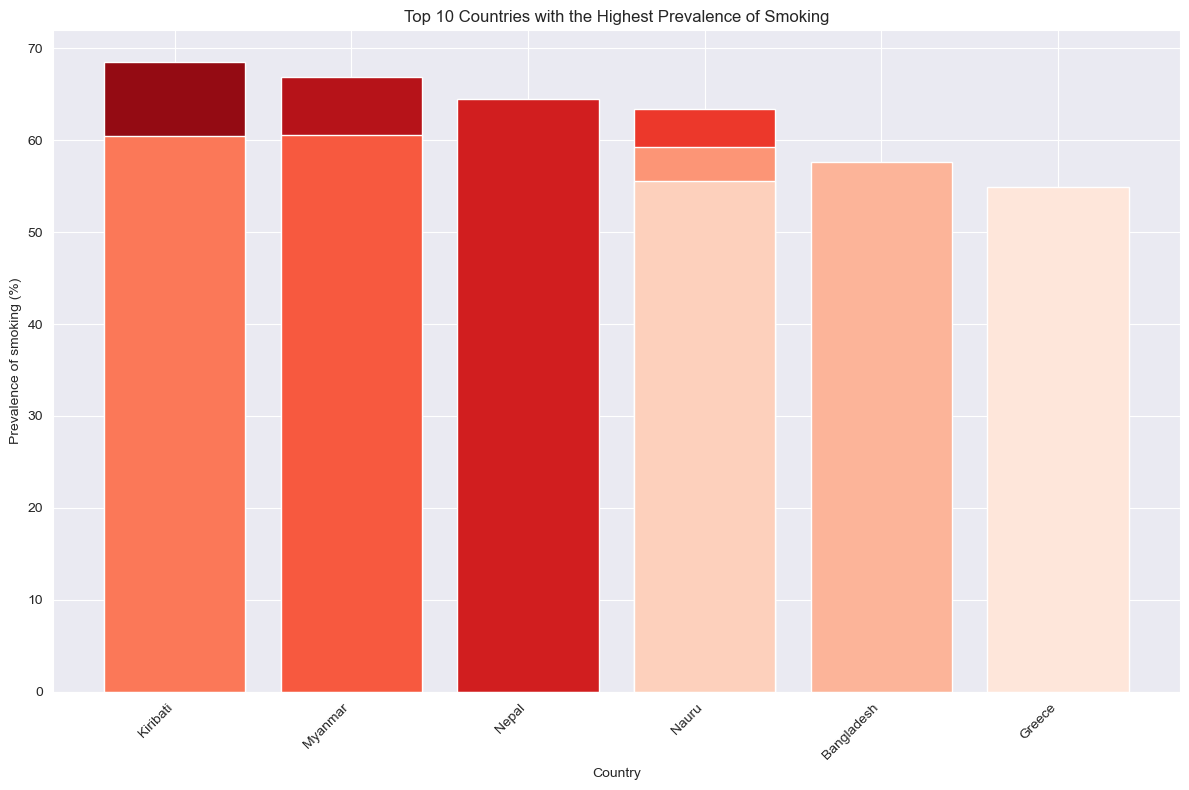

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the data

# Sort the DataFrame by 'Prevalence of current tobacco use (% of adults)' column in descending order
sorted_df = df.sort_values(by='Prevalence of current tobacco use (% of adults)', ascending=False)

# Select the top 10 countries with the highest prevalence of smoking
top_10_countries = sorted_df.head(10)

# Define a custom color palette with hues of red
red_palette = sns.color_palette("Reds_r", n_colors=10)

# Plot the top 10 countries using the custom color palette
plt.figure(figsize=(12, 8))
plt.bar(top_10_countries['Entity'], top_10_countries['Prevalence of current tobacco use (% of adults)'], color=red_palette)
plt.xlabel('Country')
plt.ylabel('Prevalence of smoking (%)')
plt.title('Top 10 Countries with the Highest Prevalence of Smoking')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [33]:
filtered_df = df[df['Year'].isin([2000, 2020])]

# Pivot the DataFrame to have one row per country and columns for the years 2000 and 2020
pivot_df1 = filtered_df.pivot(index='Entity', columns='Year', values='Prevalence of current tobacco use (% of adults)')

# Calculate the change in prevalence between 2000 and 2020
pivot_df1['Change'] = pivot_df1[2020] - pivot_df1[2000]

# Sort the DataFrame by the change in prevalence in descending order and show the top 10 countries
top_10_entities = pivot_df1.nlargest(10, 'Change')

print("Top 10 entities with the greatest change in smoking prevalence between 2000 and 2020:")
print(top_10_entities[['Change']])


Top 10 entities with the greatest change in smoking prevalence between 2000 and 2020:
Year              Change
Entity                  
Jordan               4.1
Moldova              3.7
Congo                2.6
Croatia              2.5
Indonesia            2.2
Oman                 0.4
Saudi Arabia         0.1
Singapore            0.1
Egypt                0.0
Marshall Islands     0.0


In [35]:
df.sample(3)

,Entity,Code,Year,Prevalence of current tobacco use (% of adults)
692,Maldives,MDV,2020,25.2
40,Armenia,ARM,2019,25.8
63,Bahamas,BHS,2000,10.7


In [36]:
# Group the filtered DataFrame by year and find the entity with the highest and lowest prevalence in each year
highest_prevalence = filtered_df.loc[filtered_df.groupby('Year')['Prevalence of current tobacco use (% of adults)'].idxmax()]
lowest_prevalence = filtered_df.loc[filtered_df.groupby('Year')['Prevalence of current tobacco use (% of adults)'].idxmin()]

# Display the result
print("Entity with the highest prevalence of smoking:")
print(highest_prevalence[['Year', 'Entity', 'Prevalence of current tobacco use (% of adults)']])

print("\nEntity with the lowest prevalence of smoking:")
print(lowest_prevalence[['Year', 'Entity', 'Prevalence of current tobacco use (% of adults)']])

Entity with the highest prevalence of smoking:
     Year    Entity  Prevalence of current tobacco use (% of adults)
574  2000  Kiribati                                             68.5
804  2020     Nauru                                             48.5

Entity with the lowest prevalence of smoking:
     Year    Entity  Prevalence of current tobacco use (% of adults)
364  2000  Ethiopia                                              6.8
433  2020     Ghana                                              3.5


In [1]:
# This completes the EDA of Smoking Prevelance % in Adults Globally.

In [2]:
# We are now going to add additional information about smoking and statistics from ourworldindata.org

In [5]:
df3 = pd.read_csv(r"C:\Users\David Nguyen\Desktop\data analyst learning folder\Portfolio projects\number-of-current-smokers.csv")

In [6]:
df3.sample(5)

,Entity,Code,Year,"Number of Adults Who Were Current Smokers, Female (American Lung Association (2011))","Number of Adults Who Were Current Smokers, Male (American Lung Association (2011))"
13,United States,USA,2003,21100000,24300000
1,United States,USA,1970,21600000,26400000
0,United States,USA,1965,21100000,28900000
2,United States,USA,1974,23100000,25800000
14,United States,USA,2004,20500000,23900000


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column                                                                                Non-Null Count  Dtype 
---  ------                                                                                --------------  ----- 
 0   Entity                                                                                20 non-null     object
 1   Code                                                                                  20 non-null     object
 2   Year                                                                                  20 non-null     int64 
 3   Number of Adults Who Were Current Smokers, Female (American Lung Association (2011))  20 non-null     int64 
 4   Number of Adults Who Were Current Smokers, Male (American Lung Association (2011))    20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 932.0+ bytes


In [9]:
df3.head()

,Entity,Code,Year,"Number of Adults Who Were Current Smokers, Female (American Lung Association (2011))","Number of Adults Who Were Current Smokers, Male (American Lung Association (2011))"
0,United States,USA,1965,21100000,28900000
1,United States,USA,1970,21600000,26400000
2,United States,USA,1974,23100000,25800000
3,United States,USA,1980,24100000,27500000
4,United States,USA,1985,24700000,25700000


In [10]:
df3.tail()

,Entity,Code,Year,"Number of Adults Who Were Current Smokers, Female (American Lung Association (2011))","Number of Adults Who Were Current Smokers, Male (American Lung Association (2011))"
15,United States,USA,2005,20300000,24800000
16,United States,USA,2006,20200000,25000000
17,United States,USA,2007,19800000,23600000
18,United States,USA,2008,21100000,24800000
19,United States,USA,2009,21000000,25700000


In [11]:
df3.describe()

,Year,"Number of Adults Who Were Current Smokers, Female (American Lung Association (2011))","Number of Adults Who Were Current Smokers, Male (American Lung Association (2011))"
count,20.000000,2.000000e+01,2.000000e+01
mean,1994.900000,2.173000e+07,2.518500e+07
std,13.238302,1.251567e+06,1.267519e+06
min,1965.000000,1.980000e+07,2.360000e+07
25%,1988.750000,2.107500e+07,2.437500e+07
50%,1999.500000,2.160000e+07,2.480000e+07
75%,2004.250000,2.232500e+07,2.570000e+07
max,2009.000000,2.470000e+07,2.890000e+07


In [12]:
df3.describe(include=object)

,Entity,Code
count,20,20
unique,1,1
top,United States,USA
freq,20,20


In [14]:
#Check for null values
df3.isnull().sum()

Entity                                                                                  0
Code                                                                                    0
Year                                                                                    0
Number of Adults Who Were Current Smokers, Female (American Lung Association (2011))    0
Number of Adults Who Were Current Smokers, Male (American Lung Association (2011))      0
dtype: int64

In [16]:
# Check for duplicates
duplicates = df3.duplicated().sum()
print("\nNumber of duplicate rows in df3:", duplicates)


Number of duplicate rows in df3: 0


In [17]:
summary_stats = df3.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              Year  \
count    20.000000   
mean   1994.900000   
std      13.238302   
min    1965.000000   
25%    1988.750000   
50%    1999.500000   
75%    2004.250000   
max    2009.000000   

       Number of Adults Who Were Current Smokers, Female (American Lung Association (2011))  \
count                                       2.000000e+01                                      
mean                                        2.173000e+07                                      
std                                         1.251567e+06                                      
min                                         1.980000e+07                                      
25%                                         2.107500e+07                                      
50%                                         2.160000e+07                                      
75%                                         2.232500e+07                                      
max                  

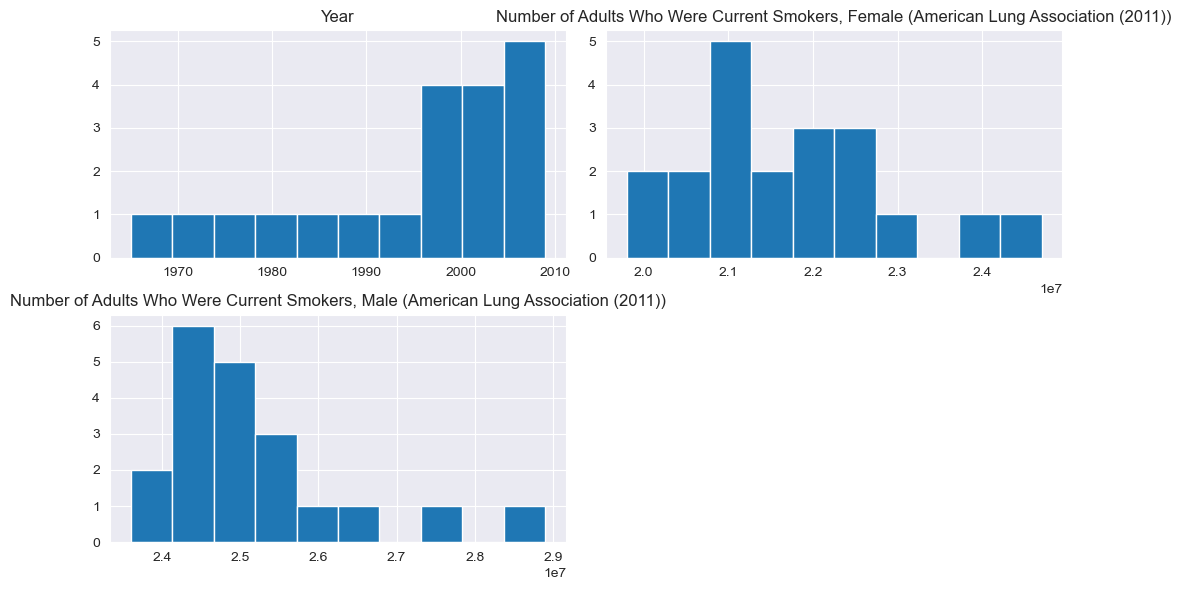

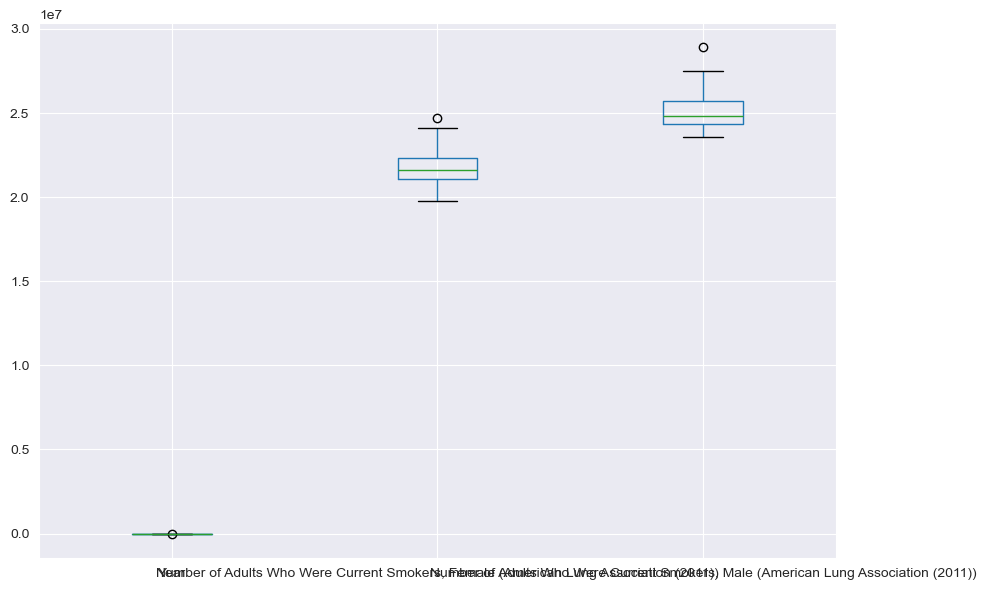

In [18]:

# Histograms
df3.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Box plots
df3.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

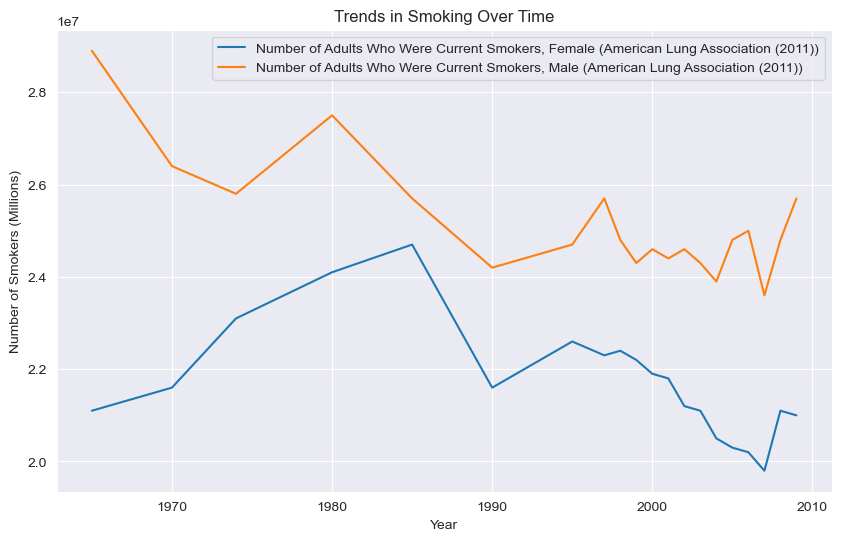

In [23]:
# Time series plot
df3.plot(x='Year', y=['Number of Adults Who Were Current Smokers, Female (American Lung Association (2011))',
                      'Number of Adults Who Were Current Smokers, Male (American Lung Association (2011))'],
         figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Smokers (Millions)')
plt.title('Trends in Smoking Over Time')
plt.legend()
plt.show()

In [25]:
df4 = pd.read_csv(r"C:\Users\David Nguyen\Desktop\data analyst learning folder\Portfolio projects\number-of-cigarettes-smoked-per-smoker-per-day.csv")

In [26]:
df4.sample(5)

,Entity,Code,Year,"Number of cigarettes smoked per smoker per day, males (ISS (2017))","Number of cigarettes smoked per smoker per day, females (ISS (2017))"
3,United States,USA,1959,9.9,6.8
46,United States,USA,2013,15.5,13.5
43,United States,USA,2010,16.5,14.0
13,United States,USA,1977,22.0,18.0
16,United States,USA,1980,23.0,19.5


In [27]:
df4.head()

,Entity,Code,Year,"Number of cigarettes smoked per smoker per day, males (ISS (2017))","Number of cigarettes smoked per smoker per day, females (ISS (2017))"
0,United States,USA,1947,24.0,18.0
1,United States,USA,1955,18.0,13.0
2,United States,USA,1958,8.9,6.8
3,United States,USA,1959,9.9,6.8
4,United States,USA,1965,21.0,17.0


In [28]:
df4.tail()

,Entity,Code,Year,"Number of cigarettes smoked per smoker per day, males (ISS (2017))","Number of cigarettes smoked per smoker per day, females (ISS (2017))"
43,United States,USA,2010,16.5,14.0
44,United States,USA,2011,16.5,14.0
45,United States,USA,2012,15.5,14.0
46,United States,USA,2013,15.5,13.5
47,United States,USA,2014,15.0,12.0


In [29]:
df4.describe()

,Year,"Number of cigarettes smoked per smoker per day, males (ISS (2017))","Number of cigarettes smoked per smoker per day, females (ISS (2017))"
count,48.000000,48.000000,48.000000
mean,1988.125000,19.358333,15.976736
std,17.315133,3.133269,2.694693
min,1947.000000,8.900000,6.800000
25%,1975.750000,18.000000,14.875000
50%,1990.500000,19.500000,16.750000
75%,2002.250000,22.000000,18.000000
max,2014.000000,24.000000,19.500000


In [30]:
df4.describe(include=object)

,Entity,Code
count,48,48
unique,1,1
top,United States,USA
freq,48,48


In [31]:
df4.isnull().sum()

Entity                                                                  0
Code                                                                    0
Year                                                                    0
Number of cigarettes smoked per smoker per day, males (ISS (2017))      0
Number of cigarettes smoked per smoker per day, females (ISS (2017))    0
dtype: int64

In [33]:
duplicates = df4.duplicated().sum()
print("\nNumber of duplicate rows in df4:", duplicates)


Number of duplicate rows in df4: 0


In [34]:
df4_summary_stats = df4.describe()
print("Summary Statistics:")
print(df4_summary_stats)

Summary Statistics:
              Year  \
count    48.000000   
mean   1988.125000   
std      17.315133   
min    1947.000000   
25%    1975.750000   
50%    1990.500000   
75%    2002.250000   
max    2014.000000   

       Number of cigarettes smoked per smoker per day, males (ISS (2017))  \
count                                          48.000000                    
mean                                           19.358333                    
std                                             3.133269                    
min                                             8.900000                    
25%                                            18.000000                    
50%                                            19.500000                    
75%                                            22.000000                    
max                                            24.000000                    

       Number of cigarettes smoked per smoker per day, females (ISS (2017))  
count    

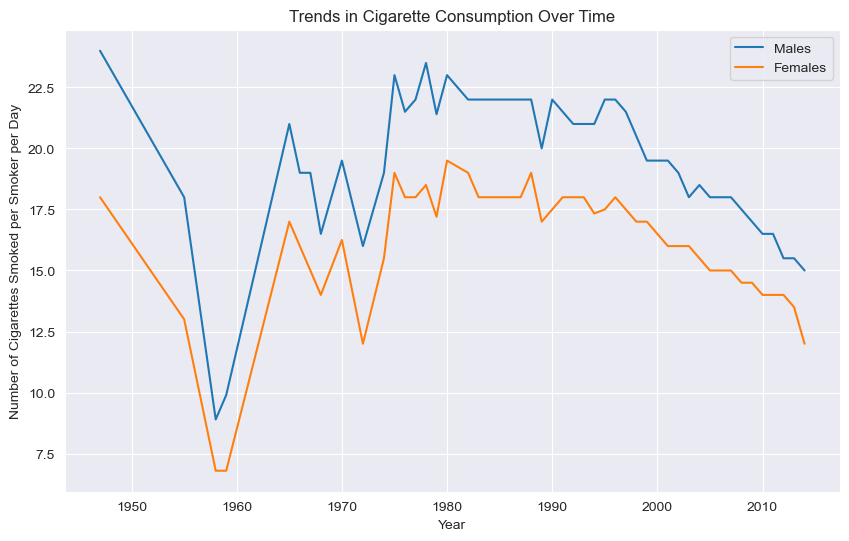

In [37]:
df4['Year'] = pd.to_datetime(df4['Year'], format='%Y')
df4.set_index('Year', inplace=True)

# Plot time series for males and females
plt.figure(figsize=(10, 6))
plt.plot(df4.index, df4['Number of cigarettes smoked per smoker per day, males (ISS (2017))'], label='Males')
plt.plot(df4.index, df4['Number of cigarettes smoked per smoker per day, females (ISS (2017))'], label='Females')
plt.xlabel('Year')
plt.ylabel('Number of Cigarettes Smoked per Smoker per Day')
plt.title('Trends in Cigarette Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()

### Insight: Decreasing Trend in Smoking Prevalence

Analysis of the trends in cigarette consumption over time reveals a decrease in smoking prevalence among both males and females in the United States. From the historical data spanning several decades, it is evident that the number of cigarettes smoked per smoker per day exhibited a declining trend. This decline suggests a positive shift in public health behaviors, possibly due to efforts in tobacco control and smoking prevention programs.

The decreasing trend in smoking prevalence displays the importance of ongoing public health campaigns, policies, and interventions aimed at reducing tobacco use and improving overall population health.
This is evident in our initial EDA showing the decreased smoking prevalence in other countries around the world.

All data was pulled directly from https://ourworldindata.org/smoking.